## Test sampling from Levy stable distribution

Verify that random samples from the Levy stable distribution calculated using `levy()` correctly.

In [1]:
import numpy as np
import levy
from scipy.integrate import quad
import matplotlib.pyplot as plt
%matplotlib inline

Test the functions by recreating the data in Table 1 from Mantegna (1994)

In [2]:
alpha = np.array((0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 1.95, 1.99))

print 'alpha  sigmax     K       C'
for i in alpha:
    print '%-1.2f   %-1.5f  %-1.4f  %-1.4f' % (i, levy.sigmax(i), levy.K(i), levy.C(i))

alpha  sigmax     K       C
0.80   1.13999  0.7951  2.4830
0.90   1.06618  0.8994  2.7675
1.00   1.00000  1.0000  2.8562
1.10   0.93829  1.1006  2.9450
1.20   0.87883  1.2052  2.9410
1.30   0.81984  1.3184  2.9005
1.40   0.75968  1.4465  2.8315
1.50   0.69657  1.5992  2.7370
1.60   0.62823  1.7936  2.6125
1.70   0.55113  2.0645  2.4465
1.80   0.45864  2.5015  2.2060
1.90   0.33382  3.4615  1.7915
1.95   0.24118  4.8066  1.3925
1.99   0.11069  10.4980  0.6089


Verify that the Levy random numbers give the correct Levy stable probability density function

In [3]:
# Levy probability density function by numerical integration
def L(z, alpha, gamma=1):
    
    f = lambda q : 1.0 / np.pi * np.exp(- gamma * np.power(q, alpha)) * np.cos(q * z)

    integral, err = quad(f, 0, np.inf)
    return integral

Random samples calculated by levy()

In [4]:
alpha = 1.5
n = int(1e6)
data = np.zeros(n)

for i in range(0,n):
    data[i] = levy.levy(alpha, n=2)

Levy stable pdf calculated by numerical integration

In [5]:
x = np.arange(-10,10,0.1)
y = np.zeros(x.size)

for i in range(0, x.size):
    y[i] = L(x[i], alpha)

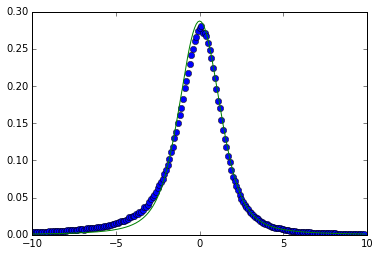

In [6]:
bins = np.arange(-10,10,0.1);
hist, bin_edges = np.histogram(data, bins, normed=True)

plt.plot(bin_edges[0:len(hist)], hist, 'o');
plt.plot(x,y)